# Análise Exploratória do Conjunto de Dados: Breast Cancer Wisconsin (Diagnostic)

Neste notebook, exploraremos os dados do conjunto **"Breast Cancer Wisconsin (Diagnostic) Data Set"**, disponível no [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data).  
Realizaremos uma análise exploratória para entender as características das variáveis e obter insights iniciais sobre o dataset.

---

## 📊 Visão Geral do Dataset

O **Breast Cancer Wisconsin (Diagnostic) Dataset** provém do *UCI Machine Learning Repository* e está disponível no Kaggle com o título _"breast-cancer-wisconsin-data"_.  

É amplamente utilizado em disciplinas de Ciência de Dados e *Machine Learning* como um exemplo clássico de tarefa de **classificação binária** — diagnóstico de câncer de mama **benigno (B)** ou **maligno (M)**.

---

## 🔢 Informações sobre os Atributos

1. **ID number**  
2. **Diagnosis** (M = Malignant, B = Benign)  
3–32. **Características computadas para cada núcleo celular:**

As seguintes 10 características de valor real são avaliadas para cada núcleo:

- **a)** `radius`: média das distâncias do centro aos pontos do perímetro  
- **b)** `texture`: desvio padrão dos valores da escala de cinza  
- **c)** `perimeter`  
- **d)** `area`  
- **e)** `smoothness`: variação local nos comprimentos dos raios  
- **f)** `compactness`: (perimeter² / area - 1.0)  
- **g)** `concavity`: gravidade das porções côncavas do contorno  
- **h)** `concave points`: número de porções côncavas do contorno  
- **i)** `symmetry`  
- **j)** `fractal dimension`: "coastline approximation" - 1  

---

## 📐 Estrutura das Variáveis

Para cada uma das 10 características acima, foram calculadas 3 métricas estatísticas:

- **Mean** (média)  
- **SE** (erro padrão)  
- **Worst** (maior valor entre os três maiores valores registrados)

Isso resulta em **30 atributos numéricos**, por exemplo:

- Campo 3: `mean radius`  
- Campo 13: `radius SE`  
- Campo 23: `worst radius`  

---

## ℹ️ Outras Informações Relevantes

- Todos os valores foram normalizados com **quatro dígitos significativos**  
- **Não há valores ausentes (missing values)**  
- **Distribuição das classes:**
  - **357** casos benignos (B)
  - **212** casos malignos (M)

---


## Análise exploratória dos dados

In [1]:
# Importando bibliotecas utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

In [ ]:
# Carregando a planilha com o dataset
dados = pd.read_csv('../../data/breast-cancer-wisconsin-data.csv') 
# visualizando cabeçalho e parte dos dados originais
dados.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 🧹 Remoção de Colunas Irrelevantes

Com base na documentação do dataset e na análise preliminar do cabeçalho, identificamos que as colunas `id` e `Unnamed: 32` **não possuem relevância analítica** para o nosso objetivo.

Essas colunas não apresentam **correlação com a variável-alvo `diagnosis`** (diagnóstico de tumor maligno ou benigno) e, portanto, serão removidas para:

- Eliminar ruído nos dados  
- Reduzir o risco de overfitting  
- Otimizar a performance dos modelos  
- Melhorar a interpretabilidade das análises

A limpeza de dados é uma etapa essencial para garantir resultados consistentes e confiáveis ao longo do processo analítico.

In [3]:
# Removendo colunas desnecessárias/irrevelevantes para o estudo
dados.drop(columns=['id', 'Unnamed: 32'], inplace=True)
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 🔄 Conversão da Coluna `diagnosis`

A coluna `diagnosis` representa o diagnóstico do tumor e é uma **variável categórica**.  
Para facilitar a análise e aplicação de modelos de machine learning, realizamos a seguinte conversão para valores numéricos:

- 🟥 **Maligno (`'M'`)** → **1**
- 🟩 **Benigno (`'B'`)** → **0**

In [4]:
# Transformar a variável categória "diagnosis" em um valor numérico
dados['diagnosis'] = dados['diagnosis'].map({'M': 1, 'B': 0})
dados.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
## Descrevendo os dados para uma análise geral dos valores presentes
dados.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## 🔍 Correlação entre as Variáveis e a Coluna-Alvo `diagnosis`

A seleção de variáveis com alta correlação com a variável-alvo `diagnosis` é uma etapa essencial na construção de modelos preditivos.  
Essa análise permite identificar quais atributos possuem relação estatística significativa com o diagnóstico (benigno ou maligno), ajudando a:

- Reduzir a dimensionalidade do dataset  
- Eliminar variáveis irrelevantes ou redundantes  
- Melhorar a performance e a generalização do modelo  

A seguir, será calculada a matriz de correlação entre as variáveis do dataset, com foco na identificação dos atributos mais correlacionados com `diagnosis`.

In [6]:
# Correlacao entre as variaveis com relacao ao alvo diagnosis
corr_com_diagnosis = dados.corr()['diagnosis'].abs().sort_values(ascending=False)
print(corr_com_diagnosis)

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
smoothness_se              0

## Vamos selecionar apenas as variáveis com maior correlação com o alvo utilizando correlação absoluta maior que 0.7

In [7]:
# Selecionamos as variáveis com correlação absoluta maior que 0.7 (inclusive a própria coluna diagnosis)
maior_corr_com_diagnosis = corr_com_diagnosis[corr_com_diagnosis > 0.7].index.tolist()
# cortar a tabela original selecionando apenas as colunas com corr > 0.7
df_cut = dados[maior_corr_com_diagnosis]
df_cut.head()

,diagnosis,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean
0,1,0.2654,184.60,0.14710,25.38,122.80,2019.0,17.99,1001.0
1,1,0.1860,158.80,0.07017,24.99,132.90,1956.0,20.57,1326.0
2,1,0.2430,152.50,0.12790,23.57,130.00,1709.0,19.69,1203.0
3,1,0.2575,98.87,0.10520,14.91,77.58,567.7,11.42,386.1
4,1,0.1625,152.20,0.10430,22.54,135.10,1575.0,20.29,1297.0


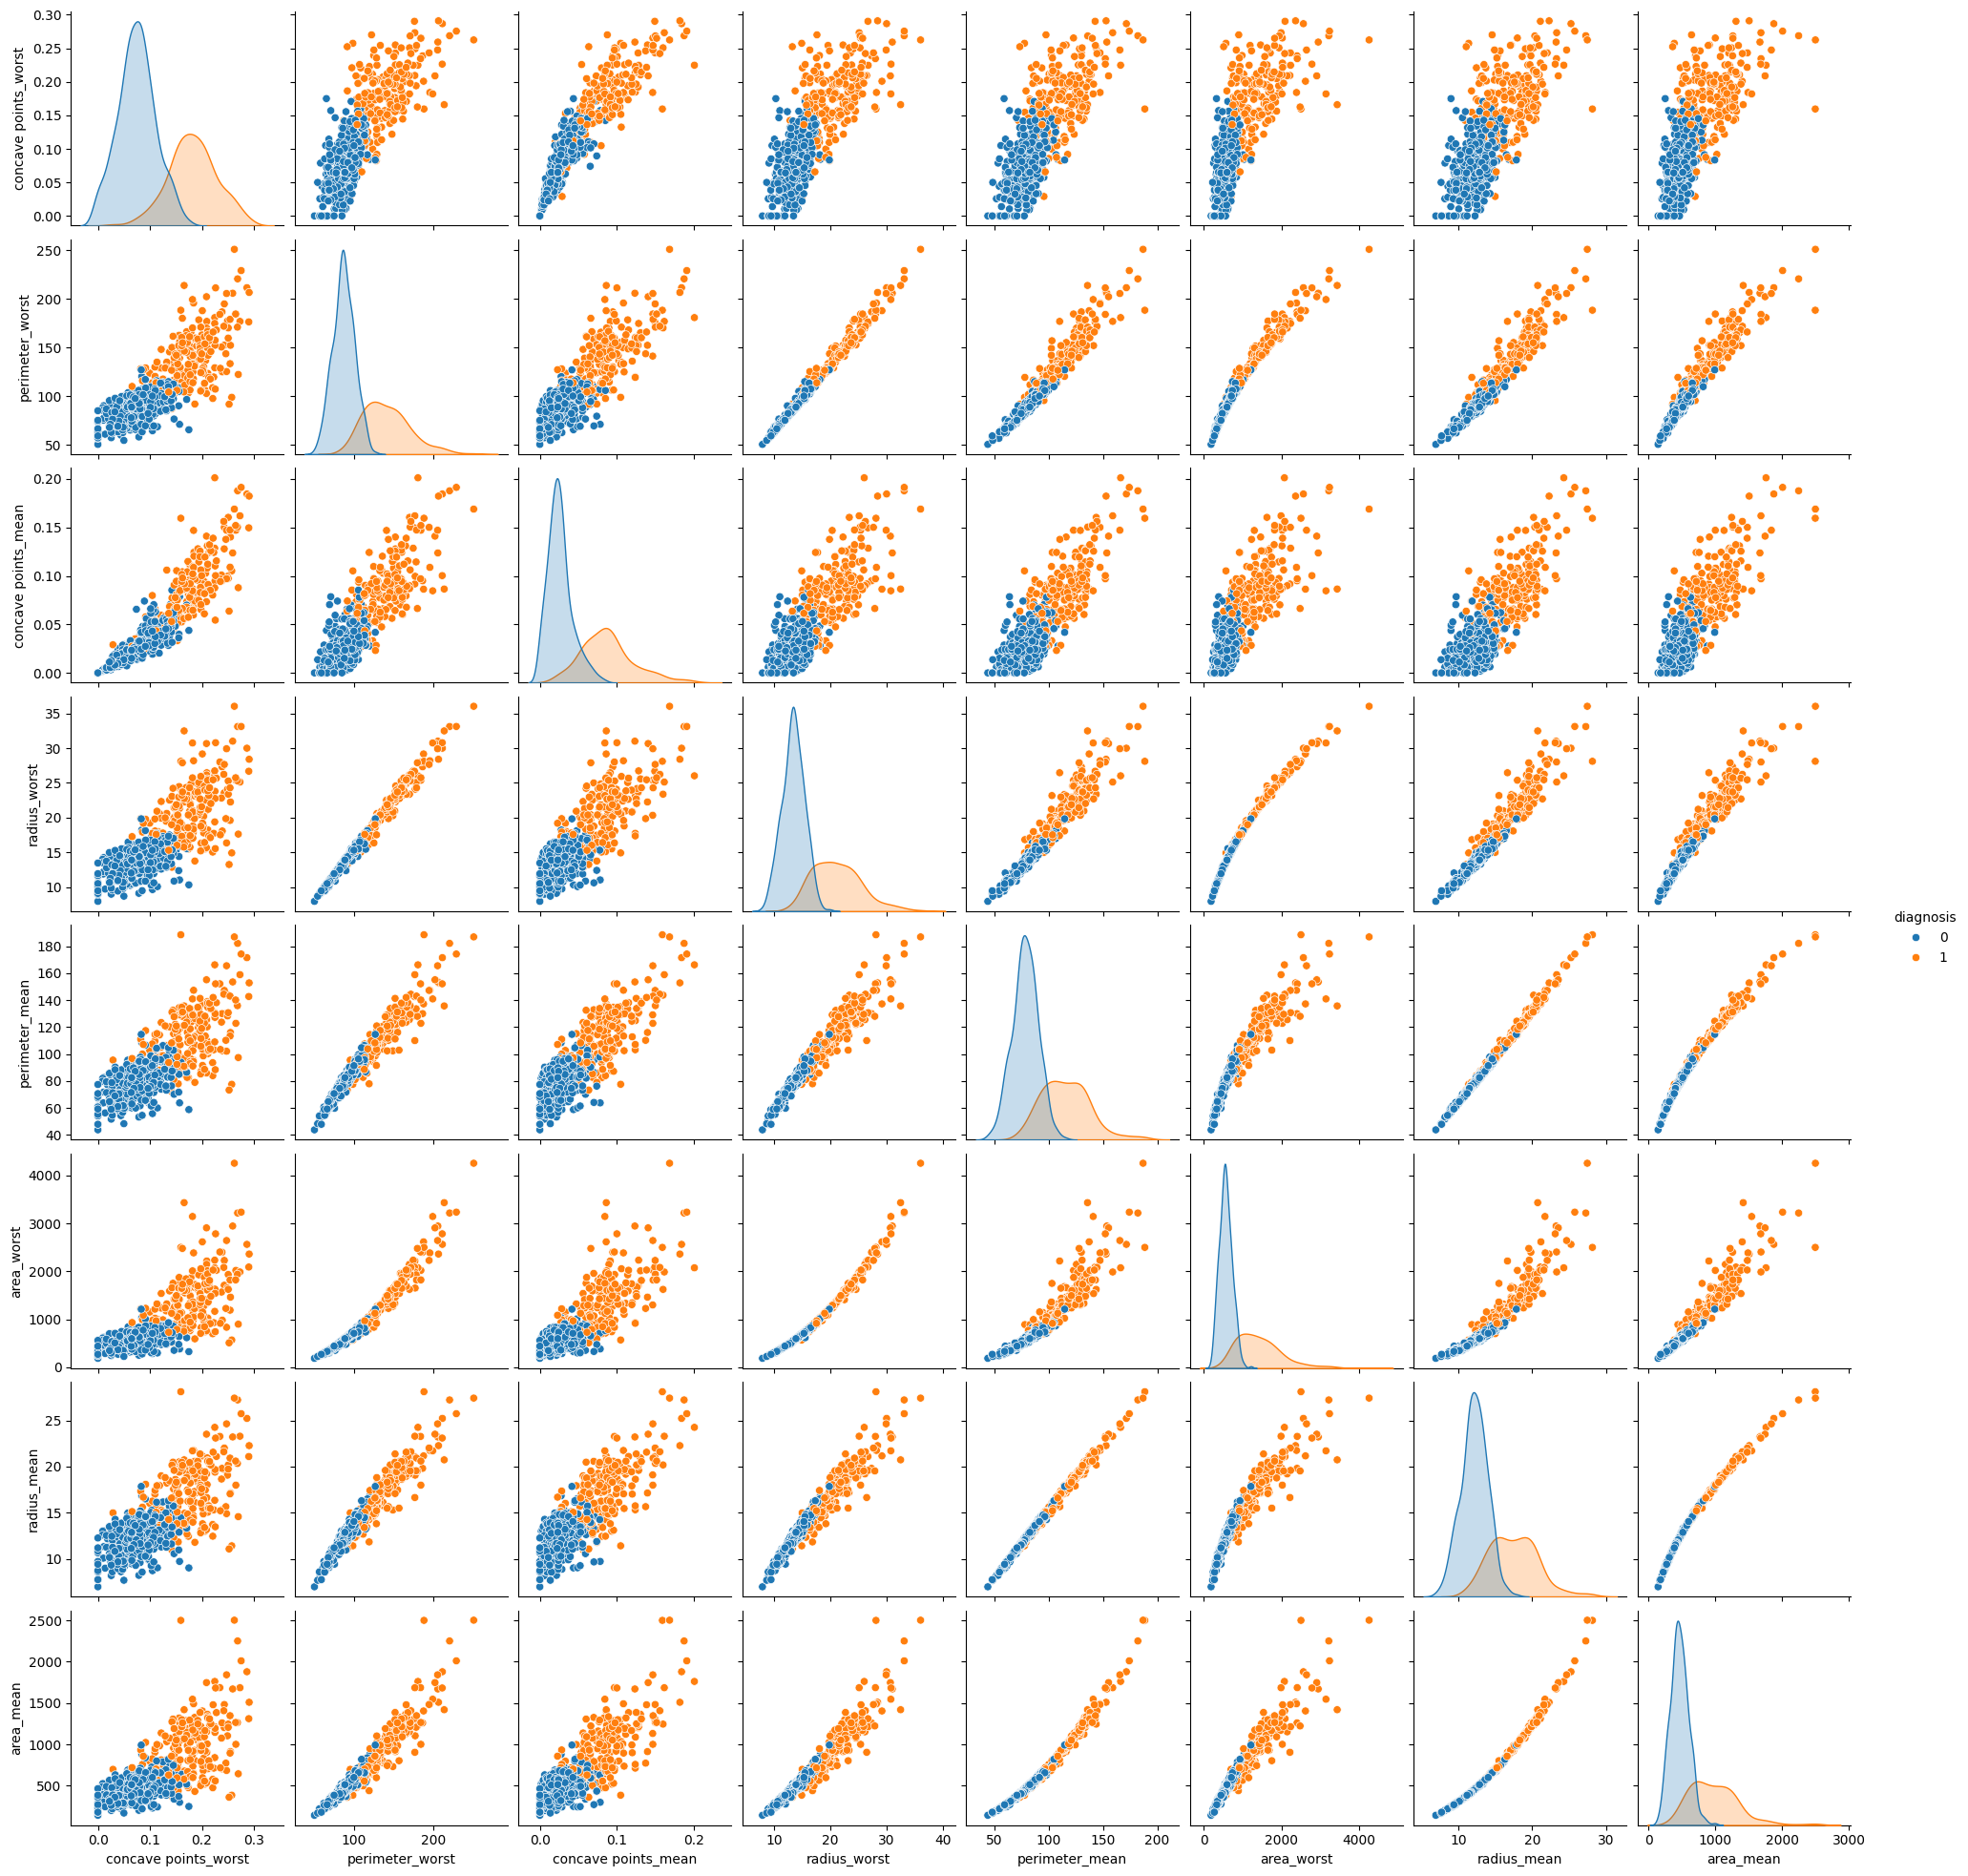

In [8]:
# Vamos analisar a correção entre as variáveis com correlação absoluta maior que 0.7 e diagnosis
maior_corr_com_diagnosis.remove('diagnosis')
sns.pairplot(df_cut, vars=maior_corr_com_diagnosis, hue="diagnosis")

<Axes: >

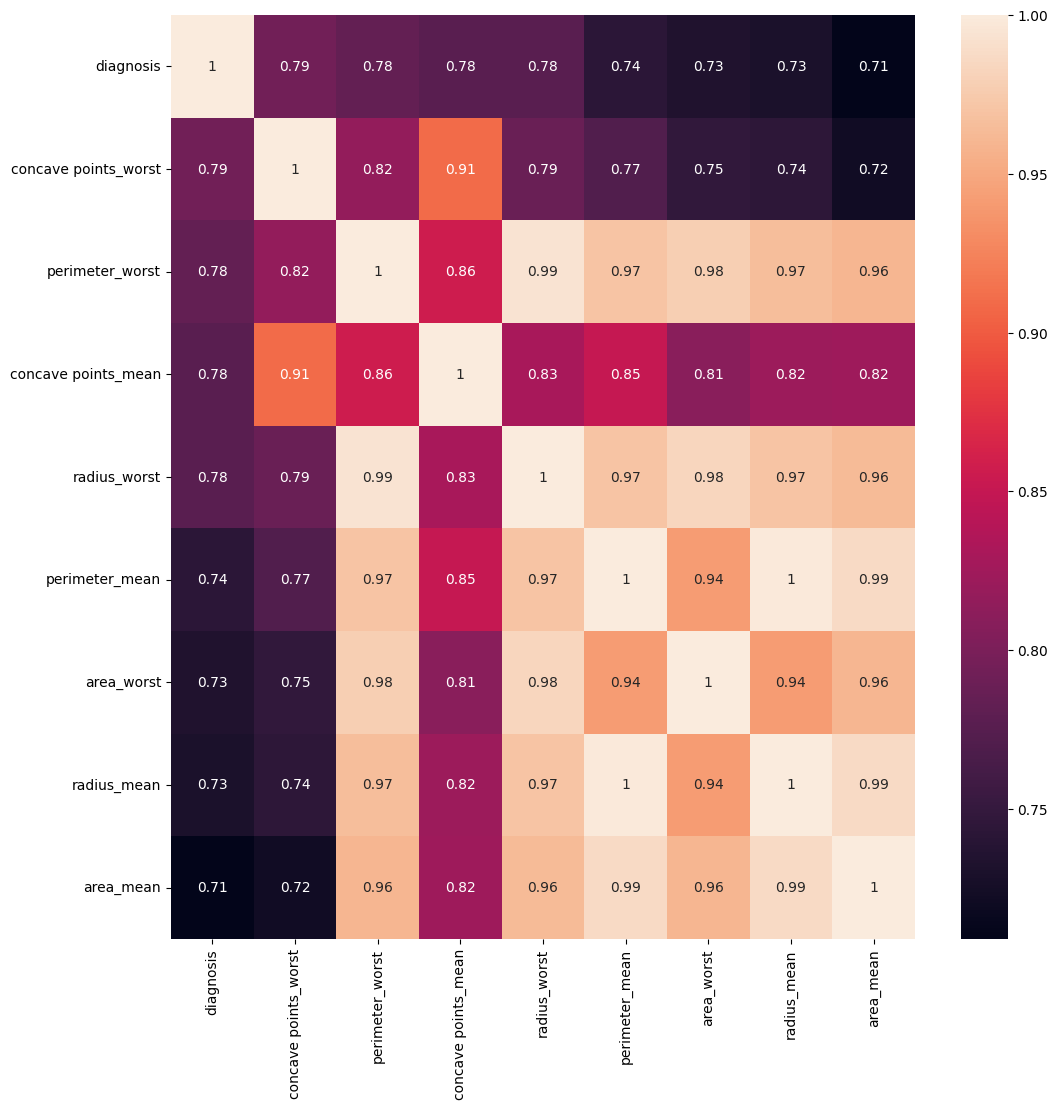

In [9]:
correlation = df_cut.corr()
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(correlation, annot=True,  ax=ax)

## 📊 Observações sobre a Correlação com `diagnosis`

**Destaques de correlação mais alta**:
- `concave points_worst` → **0.79**
- `perimeter_worst` → **0.78**
- `concave points_mean` → **0.78**
- `radius_worst` → **0.78**

---

## 🔹 Tendência clara de separação visual
- No **pairplot**, os pontos **azuis** (*diagnóstico 0*) e **laranjas** (*diagnóstico 1*) formam **agrupamentos distintos**, sugerindo **boa separabilidade** entre classes para essas variáveis.
- Essa separação visual reforça o **potencial discriminatório** dessas *features*.

---

## 🔹 Alta multicolinearidade entre as features
Muitas variáveis apresentam **correlação entre si acima de 0.90**, como:
- `radius_worst` e `perimeter_worst` (**0.99**)
- `radius_mean` e `area_mean` (**0.99**)
- `perimeter_mean` e `radius_mean` (**0.97**)

Isso indica **redundância de informação**, sugerindo que o modelo pode se beneficiar de:
- **Seleção de variáveis**
- **Redução de dimensionalidade** (*ex.: PCA*)

---

## 🔹 Implicações para modelagem
- Modelos **sensíveis à multicolinearidade** (ex.: Regressão Logística) podem precisar de **normalização**.
- Em modelos **baseados em distância** (ex.: KNN), variáveis redundantes podem **amplificar o peso** de determinadas dimensões, tornando a **normalização essencial**.


In [10]:
dados.groupby('diagnosis').describe()

radius_mean                                                      \
                count       mean       std     min     25%     50%    75%   
diagnosis                                                                   
0               357.0  12.146524  1.780512   6.981  11.080  12.200  13.37   
1               212.0  17.462830  3.203971  10.950  15.075  17.325  19.59   

                 texture_mean             ... symmetry_worst          \
             max        count       mean  ...            75%     max   
diagnosis                                 ...                          
0          17.85        357.0  17.914762  ...       0.298300  0.4228   
1          28.11        212.0  21.604906  ...       0.359225  0.6638   

          fractal_dimension_worst                                         \
                            count      mean       std      min       25%   
diagnosis                                                                  
0                           357.0  0.079442  0.013804  0.05521  0.070090   
1                           212.0  0.091530  0.021553  0.05504  0.076302   

                                      
               50%       75%     max  
diagnosis                             
0          0.07712  0.085410  0.1486  
1          0.08760  0.102625  0.2075  

[2 rows x 240 columns]


## Separação dos dados de treinamento e testes

In [11]:
#Separar X e Y selecionando as variáveis com maior correção e sem redundância 
x = df_cut[['concave points_worst','perimeter_worst','concave points_mean','radius_worst']]
y = df_cut['diagnosis']

# Dividir treino e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42, stratify=y)


## Normalização - Padronização dos Dados
Como parte do pré-processamento, foi aplicado a padronização dos atributos numéricos, utilizando a técnicas STANDARDSCALER, que transforma os dados para que tenha média zero e desvio padrão um.

A normalização é fundamental para o bom desempenho de algoritmos que são sensíveis à escalas dos dados, como:
- KNN (K-Nearest Neighbors)
- Regressão Logística


In [13]:
from sklearn.preprocessing import StandardScaler

# Identificar colunas númericas para padronizar
colunas_numericas = ['concave points_worst','perimeter_worst','concave points_mean','radius_worst']

# Criar cópias para não modeificar original
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

#Aplicar StandardScaler só nas colunas numéricas
scaler = StandardScaler()
X_train_scaled[colunas_numericas] = scaler.fit_transform(X_train[colunas_numericas])
X_test_scaled[colunas_numericas] = scaler.transform(X_test[colunas_numericas])

# Agora se pode usar X_train_Scales e X_test_scaled para treina modelos sensiveis à escala

##  🎯 Modelagem, Treinamento e Avaliação

A seguir serão realizadas as seguintes etapas:
- Treinamento: KNN e Regressão Logística
- Avaliação dos modelos (com e sem normalização)

## 📌 Por que usar KNN e Regressão Logística no Diagnóstico de Câncer

### 🔹 KNN – K Vizinhos Mais Próximos
O algoritmo **KNN – K Vizinhos Mais Próximos** é adequado para avaliação nesse dataset de diagnóstico de câncer por ser um método **simples**, **intuitivo** e **não paramétrico**, capaz de capturar **padrões locais** e **relações não lineares** entre atributos.  
Ele compara novos casos com amostras semelhantes, o que é útil para **identificar diagnósticos a partir de perfis clínicos próximos**.  
Com a devida **normalização**, o KNN serve como um **bom modelo de referência (*baseline*)** para comparação com outros algoritmos mais complexos.


### 🔹 Regressão Logística
A **Regressão Logística** é indicada para avaliação nesse dataset de diagnóstico de câncer por ser um modelo **simples**, **interpretável** e **eficiente** para **classificação binária**.  
Ela permite **estimar probabilidades** e **identificar a relevância de cada variável** no diagnóstico, facilitando a explicação dos resultados para profissionais da área médica.  
Além disso, com a **normalização adequada**, tende a apresentar **bom desempenho** mesmo em datasets menores e com variáveis correlacionadas.


In [14]:
#Treinamento do Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Previsões com o modelo KNN
y_pred_knn = knn_model.predict(X_test)

In [15]:
# Exibindo as previsões do modelo
print("Previsões do modelo KNN:")
print(y_pred_knn)

# Avaliando o modelo KNN
print("Métricas de Avaliação do Modelo KNN:")
print("Acurácia:", accuracy_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))


Previsões do modelo KNN:
[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 1 1 1]
Métricas de Avaliação do Modelo KNN:
Acurácia: 0.8771929824561403
Recall: 0.7380952380952381
F1 Score: 0.8157894736842105


In [16]:
#Treinamento do Modelo KNN
knn_model_scaled = KNeighborsClassifier(n_neighbors=3)
knn_model_scaled.fit(X_train_scaled, y_train)

# Previsões com o modelo KNN
y_pred_knn_scaled = knn_model_scaled.predict(X_test_scaled)

In [17]:
# Exibindo as previsões do modelo
print("Previsões do modelo KNN Normalizado:")
print(y_pred_knn_scaled)

# Avaliando o modelo KNN
print("Métricas de Avaliação do Modelo KNN Normalizado:")
print("Acurácia:", accuracy_score(y_test, y_pred_knn_scaled))
print("Recall:", recall_score(y_test, y_pred_knn_scaled))
print("F1 Score:", f1_score(y_test, y_pred_knn_scaled))

Previsões do modelo KNN Normalizado:
[0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
Métricas de Avaliação do Modelo KNN Normalizado:
Acurácia: 0.9298245614035088
Recall: 0.8571428571428571
F1 Score: 0.9


In [18]:
#Treinamento do modelo Regressão Logística
r_log_model = LogisticRegression(max_iter=2800)
r_log_model.fit(X_train, y_train)

# Previsões com o modelo de Regressão Logística
y_pred_r_log = r_log_model.predict(X_test)

In [19]:
# Exibindo as previsões do modelo
print("Previsões do modelo de Regressão Logística:")
print(y_pred_r_log)

# Avaliando o modelo Regressão Logística
print("Métricas de Avaliação do Modelo Regressão Logística:")
print("Acurácia:", accuracy_score(y_test, y_pred_r_log))
print("Recall:", recall_score(y_test, y_pred_r_log))
print("F1 Score:", f1_score(y_test, y_pred_r_log))


Previsões do modelo de Regressão Logística:
[0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
Métricas de Avaliação do Modelo Regressão Logística:
Acurácia: 0.8947368421052632
Recall: 0.7619047619047619
F1 Score: 0.8421052631578947


In [20]:
#Treinamento do modelo Regressão Logística
r_log_model_scaled = LogisticRegression(max_iter=2800)
r_log_model_scaled.fit(X_train_scaled, y_train)

# Previsões com o modelo de Regressão Logística
y_pred_r_log_scaled = r_log_model_scaled.predict(X_test_scaled)

In [21]:
# Exibindo as previsões do modelo
print("Previsões do modelo de Regressão Logística Normalizado:")
print(y_pred_r_log_scaled)

# Avaliando o modelo Regressão Logística
print("Métricas de Avaliação do Modelo Regressão Logística Normalizado:")
print("Acurácia:", accuracy_score(y_test, y_pred_r_log_scaled))
print("Recall:", recall_score(y_test, y_pred_r_log_scaled))
print("F1 Score:", f1_score(y_test, y_pred_r_log_scaled))

Previsões do modelo de Regressão Logística Normalizado:
[0 1 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0
 0 0 0 1 0 1 1 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 1]
Métricas de Avaliação do Modelo Regressão Logística Normalizado:
Acurácia: 0.956140350877193
Recall: 0.9285714285714286
F1 Score: 0.9397590361445783


In [22]:
# Comparação de modelos utilizados
# Função para gerar métricas
def gerar_metricas(nome, y_test_metr, y_pred):
    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test_metr, y_pred),
        'Recall': recall_score(y_test_metr, y_pred),
        'Precisão': precision_score(y_test_metr, y_pred),
        'F1-Score': f1_score(y_test_metr, y_pred),
    }

# Coletar métricas de todos os modelos
resultados = [
    gerar_metricas("Regressão Logística", y_test, y_pred_r_log),
    gerar_metricas("KNN", y_test, y_pred_knn),
    gerar_metricas("Regressão Logística Normalizado", y_test, y_pred_r_log_scaled),
    gerar_metricas("KNN Normalizado", y_test, y_pred_knn_scaled),
]

# Criar DataFrame
df_resultados = pd.DataFrame(resultados)
df_resultados = df_resultados.sort_values(by='F1-Score', ascending=False)

# Exibir a tabela
print("📊 COMPARATIVO DE MODELOS")
print("-" * 26)
display(df_resultados.round(4))

📊 COMPARATIVO DE MODELOS
--------------------------


,Modelo,Acurácia,Recall,Precisão,F1-Score
2,Regressão Logística Normalizado,0.9561,0.9286,0.9512,0.9398
3,KNN Normalizado,0.9298,0.8571,0.9474,0.9000
0,Regressão Logística,0.8947,0.7619,0.9412,0.8421
1,KNN,0.8772,0.7381,0.9118,0.8158


# 📊 Resultados e Interpretação dos Dados

Abordagem de seleção: Para prever o diagnóstico de câncer com base no dataset selecionado, utilizamos **dois modelos diferentes** com e sem normalização, avaliados com as seguintes métricas:

- **Acurácia**
- **Precisão**
- **Recall**
- **F1-Score**

Conforme o resultado obtido no COMPARATIVO DE MODELOS que apresenta todas as métricas para os modelos aplicados, foi possível concluir que: 
## 🔹 Modelo KNN – K Vizinhos Mais Próximos

- Classifica as amostras com base na distância dos vizinhos mais próximos.  
- Simples e intuitivo, mas pode ter **performance inferior com dados desbalanceados**.  
- O KNN se mostrou bastante sensível à escala das variáveis e só apresentou desempenho competitivo após a normalização, embora ainda fique atrás da Regressão Logística Normalizada em todas as métricas


## 🔹 Modelo Regressão Logística
- Modelo linear, indicado para **classificação binária**.  
- Fácil de interpretar e útil para **identificar variáveis relevantes**.  
- A normalização potencializou muito o desempenho da Regressão Logística, tornando-a o modelo mais equilibrado e eficaz em todas as métricas avaliadas.

---


## Observações gerais sobre a conclusão
- Normalização é crítica: Tanto KNN quanto Regressão Logística melhoraram significativamente quando os dados foram normalizados.
  - Regressão Logística: F1-Score subiu de 0.8421 → 0.9398
  - KNN: F1-Score subiu de 0.8158 → 0.9000
- Sem normalização, Regressão Logística já supera o KNN em todas as métricas
- Com normalização, Regressão Logística continua melhor que KNN, mas a diferença diminui

## 🏆 Escolha final
De acordo com a análise realizada, o modelo recomendado é o de **Regressão Logística Normalizada**, pois é o mais consistente em todas as métricas e mantém um ótimo equilíbrio entre identificar corretamente os casos positivos e evitar falsos alarmes. 